<a href="https://colab.research.google.com/github/saibaba/IterativeMethods/blob/master/IterativeMethodsForSolvingLinearSystemOfEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to solve for linear system of equation iteratively?
===

First let's consider a single variable case
---

Given $3x = 6$, find $x$.

Split $3$ as $M+B$

$(M+B)x = 6$

$Mx =  -Bx + 6$

This splitting allows us to start with a random $x$, compute $-Bx+6$ which is $Mx$, extract x = <result>/M and 
hopefully, the extracted x is better than initial random selection:

```
Mx = -Bx+6 = -B( (-Bx+6) /M ) + 6
```

So,

```
x  = -B (-Bx/M +6/M) + 6
   = B^2 x/M - 6B/M + 6
   
```
            

Start with x = x0

Mx1 = -Bx0 + 6

or


$x1 = (\frac{-B}{M}) x0 + (\frac{6}{M})$


Let
```
    -B/M = P
    6/M = z
```

Continuing,

$\begin{aligned}
x_{i+1} &= P * x_{i} + z \\
        &= P * [ P * x_{i-1} + z ] + z \\
        &= P^2 x_{i-1} + P z + z
\end{aligned}$


**Error analysis:**

Let error in any step be distance from true value (which is not known):

e0 = x0 - x

e1 = x1 - x

...

e_i = x_i - x

Or

x_i = e_i + x

And so on. Note that this is analytical purpose only and error is not used to drive the algorithm in calculating approximation (error depends on the true value which we do not know - so can't use it to drive/stop algorithm)!.


$\begin{aligned}
x_{i+1} &= P * x_{i} + z
        &= P (x + e_{i}) + z
        &= P x + z + P e_{i}
        &= x + P e_{i}    
\end{aligned}$

This is because Px + z = x.

So,


$\begin{aligned}
e_{i+1} = x_{i+1} - x
       = P e_i + x - x
       = P e_{i}
\end{aligned}$


So, error starts decreasing if P < 1 and positive. Even if P < 1, if it is negative, convergence is questionable.


If we choose:
```
   B = -1
   M = 4
   (B+M = 3)

   P = 1/4
   z = 6/4
```

In [0]:
B = -1
M = 4

P = 0.25
z = 1.5

x0 = 1.1

x = 2

e0 = x0-x

e = [e0]

ec = e0

xl = [x0]

xc = x0

for i in range(10):
    en = P * ec
    e.append(en)
    ec = en
    xl.append(xc)
    xn = P * xc + z
    xl.append(xn)
    xc = xn
print(e)
print(xl)

# Note that x is used only for error analysis not for actual calculation of x

[-0.8999999999999999, -0.22499999999999998, -0.056249999999999994, -0.014062499999999999, -0.0035156249999999997, -0.0008789062499999999, -0.00021972656249999998, -5.4931640624999995e-05, -1.3732910156249999e-05, -3.4332275390624997e-06, -8.583068847656249e-07]
[1.1, 1.1, 1.775, 1.775, 1.94375, 1.94375, 1.9859375, 1.9859375, 1.996484375, 1.996484375, 1.99912109375, 1.99912109375, 1.9997802734375, 1.9997802734375, 1.999945068359375, 1.999945068359375, 1.9999862670898438, 1.9999862670898438, 1.9999965667724608, 1.9999965667724608, 1.9999991416931153]


Extrapolate above to multiple variable (aha! matrix) case
---

2x+3y = 7

3x+2y = 8

$
\begin{aligned}
\begin{bmatrix}
  2 && 3 \\
  3 && 2 \\
\end{bmatrix}
* 
\begin{bmatrix}
  x \\
  y \\
\end{bmatrix}
&=
\begin{bmatrix}
  7 \\
  8 \\
\end{bmatrix}
\end{aligned}$


A x = b

A is square and in general may be or may not be invertible.

Split A = M + B

(M+B)x = b

Mx = -Bx + b

Let's use an M such that it is invertible (and easily invertible)

$x = M^{-1}(-Bx+b)$

Start with random $x = x_0 = \begin{bmatrix}0 && 0\end{bmatrix}^T$

$\begin{aligned}
x_1 &= M^{-1}(-Bx_0+b) \\
    &= -M^{-1} B x_0 + M^{-1} b
\end{aligned}$

$\begin{aligned}
x_2 &= M^{-1} (-Bx_1+b) \\
    &= -M^{-1} B x_1 + M^{-1} b \\
    &= -M.T B ( -M.T B x0 + M^{-1} b ) + M^{-1} b \\
    &= M^{-1} B M^{-1} B x0 - M^{-1} B M^{-1} b + M^{-1} b
\end{aligned}$

The -ve term is concerning, it would be tough to analyze convergence.

Let's try something different, may be we could do subtraction. Let's split like this:

A = M - N

Mx - Nx = b

$x = M^{-1} N x + M^{-1} b$

$x_1 = M^{-1} N x_0 + M^{-1} b$

Let $M^{-1} N = P$ and $M^{-1} b = z$ for ease.

x_1 = P x_0 + z

$\begin{aligned}
x_2 = P (x_1) + z
   = P (P x_0 + z) + z
   = P^2 x_0 + P z + z
\end{aligned}$

**Error analysis**
    
$e_0 = x_0-x$

or 

$e_i = x_i - x$

$\begin{aligned}
x_{i+1} &= P x_i + z
        &= P (e_i + x) + z
        &= P e_i + P x + z
        &= P e_i + x
\end{aligned}$
        
$\begin{aligned}
e_{i+1} &= x_{i+1} - x
        &= P e_i
        &= P^{i+1} e_0
\end{aligned}$
        
So, we want $P^k -> 0$ in the limit for error to converge to zero.

But, $P^k$ -> 0 iff $||P^k||$ -> 0, iff $\rho(P)$ < 1.


Now, how do we find M and N?

Since we want M to be easily invertible, it would be so if it is a diagonal matrix. May be we could just take diagonal elements of A and shove in M. Remaining ones go into -N. Then A = M - N.

Then $P = M^{-1} N = M^{-1} (M-A) = I - M^{-1} A $

or $M^{-1} A = I - P $. Since $M^{-1} A$ is invertible, $I - P$ is also invertible. In this case, If $\rho(P) \le 1$, iterative method is convergent. A simpler way is to verify convergence is that M is diagonally dominant (https://math.stackexchange.com/questions/2812573/proving-the-jacobi-method-converges-for-diagonally-column-dominant-matrices/2813489). See page 68 of http://www.robots.ox.ac.uk/~sjrob/Teaching/EngComp/linAlg34.pdf.


More on this:

$ ||e_{i+1}|| = || P e_i || \le ||P||_{p} ||e_i||$ for any norm p.
If $||P||_{p} \lt 1$, the error keeps decreasing.

If A is diagonally dominated, then the ‘iteration matrix’ P has an ∞-norm that is strictly less than 1.

Note that for some norms, p,  $||P||_{p}$ might be less than 1 and may be greater than 1 for some other norms. So, this is only sufficient condition. The necessary condition is that $\rho(P) \le 1$.


Let's try on an example (not on the one introduced in this section, though).

In [0]:
import numpy as np
from numpy import linalg as LA

# works only for diagonally dominant A (equivalent to convergence of P)
# x is used for error analysis only
def solve(A, b, x, num_iter = 60):
    
    variable_count = len(x)
    x0 = np.zeros((variable_count, 1))
    
    e0 = x0-x
    e = [e0]

    ec = e0
    xl = [x0]
    xc = x0

    M = np.diag(np.diag(A))

    N = M - A
    P = LA.inv(M).dot(N)
    z = LA.inv(M).dot(b)

    eig = LA.eig(P)
    print("Eigen stuff of P")
    print(eig)

    print("Initial")
    print("M inverse: ")
    print(LA.inv(M))
    print("P (inv(M)*N): ")
    print(P)
    print ("z (inv(M) b)")
    print(z)

    print("looping")
    for i in range(num_iter):
        en = P.dot(ec)
        e.append(en)
        ec = en
        #xl.append(xc)
        xn = P.dot(xc) + z
        xl.append(xn)
        xc = xn
        print("Iter #" + str(i))
        print("Error after iteration")
        print(en)
        print("Result after iteration")
        print(xn)    
        print("-------------")

    return (e, xl)

In [0]:
import numpy as np
from numpy import linalg as LA


A = np.array([[2, -1, 0, 0], [-1, 2, -1, 0], [0, -1, 2, -1], [0, 0, -1, 2]])
b = np.array([[25], [-24], [21], [-15]])

x = np.array([[11], [-3], [7], [-4]])

el, xl = solve(A, b, x, 60)

Eigen stuff of P
(array([-0.80901699, -0.30901699,  0.80901699,  0.30901699]), array([[ 0.37174803,  0.60150096, -0.37174803, -0.60150096],
       [-0.60150096, -0.37174803, -0.60150096, -0.37174803],
       [ 0.60150096, -0.37174803, -0.60150096,  0.37174803],
       [-0.37174803,  0.60150096, -0.37174803,  0.60150096]]))
Initial
M inverse: 
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
P (inv(M)*N): 
[[0.  0.5 0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.  0.  0.5 0. ]]
z (inv(M) b)
[[ 12.5]
 [-12. ]
 [ 10.5]
 [ -7.5]]
looping
Iter #0
Error after iteration
[[ 1.5]
 [-9. ]
 [ 3.5]
 [-3.5]]
Result after iteration
[[ 12.5]
 [-12. ]
 [ 10.5]
 [ -7.5]]
-------------
Iter #1
Error after iteration
[[-4.5 ]
 [ 2.5 ]
 [-6.25]
 [ 1.75]]
Result after iteration
[[ 6.5 ]
 [-0.5 ]
 [ 0.75]
 [-2.25]]
-------------
Iter #2
Error after iteration
[[ 1.25 ]
 [-5.375]
 [ 2.125]
 [-3.125]]
Result after iteration
[[12.25 ]
 [-8.375]
 [ 9.125]
 [-7.125]]
-------------
I

In [0]:
import numpy as np
from numpy import linalg as LA

# Above method does not work for this as A is not diagonally dominant matrix
A = np.array([[2, 3], [3, 2]])
b = np.array([[7], [8]])

x = np.array([[2], [1]])

solve(A, b, x)

Eigen stuff of P
(array([ 1.5, -1.5]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))
Initial
M inverse: 
[[0.5 0. ]
 [0.  0.5]]
P (inv(M)*N): 
[[ 0.  -1.5]
 [-1.5  0. ]]
z (inv(M) b)
[[3.5]
 [4. ]]
looping
Iter #0
	Error after iteration
[[1.5]
 [3. ]]
	Result after iteration
[[3.5]
 [4. ]]
Iter #1
	Error after iteration
[[-4.5 ]
 [-2.25]]
	Result after iteration
[[-2.5 ]
 [-1.25]]
Iter #2
	Error after iteration
[[3.375]
 [6.75 ]]
	Result after iteration
[[5.375]
 [7.75 ]]
Iter #3
	Error after iteration
[[-10.125 ]
 [ -5.0625]]
	Result after iteration
[[-8.125 ]
 [-4.0625]]
Iter #4
	Error after iteration
[[ 7.59375]
 [15.1875 ]]
	Result after iteration
[[ 9.59375]
 [16.1875 ]]
Iter #5
	Error after iteration
[[-22.78125 ]
 [-11.390625]]
	Result after iteration
[[-20.78125 ]
 [-10.390625]]
Iter #6
	Error after iteration
[[17.0859375]
 [34.171875 ]]
	Result after iteration
[[19.0859375]
 [35.171875 ]]
Iter #7
	Error after iteration
[[-51.2578125 ]
 [-25.62890625]]

In [0]:
# Another example of diagonally dominance

A = np.array([[4, 2, 3], [3, -5, 2], [-2, 3, 8]])
b = np.array([[8], [-14], [27]])
x = np.array([[-1], [3], [2]])
solve(A, b, x)

Eigen stuff of P
(array([-0.08875095+0.81309913j, -0.08875095-0.81309913j,
        0.1775019 +0.j        ]), array([[ 0.66666828+0.j        ,  0.66666828-0.j        ,
        -0.55176491+0.j        ],
       [-0.22848143-0.58075007j, -0.22848143+0.58075007j,
        -0.6277451 +0.j        ],
       [ 0.23121087-0.33558982j,  0.23121087+0.33558982j,
         0.54908249+0.j        ]]))
Initial
M inverse: 
[[ 0.25   0.     0.   ]
 [-0.    -0.2   -0.   ]
 [ 0.     0.     0.125]]
P (inv(M)*N): 
[[ 0.    -0.5   -0.75 ]
 [ 0.6    0.     0.4  ]
 [ 0.25  -0.375  0.   ]]
z (inv(M) b)
[[2.   ]
 [2.8  ]
 [3.375]]
looping
Iter #0
Error after iteration
[[ 3.   ]
 [-0.2  ]
 [ 1.375]]
Result after iteration
[[2.   ]
 [2.8  ]
 [3.375]]
-------------
Iter #1
Error after iteration
[[-0.93125]
 [ 2.35   ]
 [ 0.825  ]]
Result after iteration
[[-1.93125]
 [ 5.35   ]
 [ 2.825  ]]
-------------
Iter #2
Error after iteration
[[-1.79375  ]
 [-0.22875  ]
 [-1.1140625]]
Result after iteration
[[-2.79375  ]
 [ 2.7

([array([[ 1.],
         [-3.],
         [-2.]]), array([[ 3.   ],
         [-0.2  ],
         [ 1.375]]), array([[-0.93125],
         [ 2.35   ],
         [ 0.825  ]]), array([[-1.79375  ],
         [-0.22875  ],
         [-1.1140625]]), array([[ 0.94992188],
         [-1.521875  ],
         [-0.36265625]]), array([[1.03292969],
         [0.42489063],
         [0.80818359]]), array([[-0.81858301],
         [ 0.94303125],
         [ 0.09889844]]), array([[-0.54568945],
         [-0.45159043],
         [-0.55828247]]), array([[ 0.64450707],
         [-0.55072666],
         [ 0.03292405]]), array([[0.25067029],
         [0.39987386],
         [0.36764926]]), array([[-0.47567388],
         [ 0.29746188],
         [-0.08728512]]), array([[-0.0832671 ],
         [-0.32031838],
         [-0.23046668]]), array([[ 0.33300919],
         [-0.14214693],
         [ 0.09930262]]), array([[-0.0034035 ],
         [ 0.23952656],
         [ 0.1365574 ]]), array([[-0.22218133],
         [ 0.05258086],
 

**Convergence Analysis of error continued**

What if $e_0$ = an eigenvector of P, say $v_0$ with eigenvalue $\lambda_0$?


$\begin{aligned}
e_{i+1} &= P^k v_0 \\
        &= P^{k-1} P v_0 \\
        &= P^{k-1} \lambda_0 v_0 \\
        &= \lambda_0 P^{k-1} v_0 \\
        &= \lambda^{k}_0 v_0
\end{aligned}$

If $ 0 \le \lambda_0 \lt 1$, error goes to zero.

What if $e_0$ is not an eigenvector?

It can be written as a linear combination of eigenbasis (orthonormal eigenvectors of P), say Q.

Let $v_1, v_2, \dots, v_n$ be the orthonormal eigenvectors of P.
Let $\lambda_1, \lambda_2, \dots, \lambda_n$ be corresponding eigenvalues.

$Q = [v_1  \dots v_n]$

$e_0 = c_1 v_1 + c_2 v_2 + \dots + c_n v_n$

$e_{i+1} = P^{i+1} e_0 = P^{i+1} (c_1 v_1 + c_2 v_2 + \dots + c_n v_n) = c_1 \lambda_1^{i+1} v_1 + c_2 \lambda_2^{i+1} v_2 + \dots + c_n \lambda_n^{i+1} v_n$.

Iff $\lambda_i \lt 1$ for all i, $e_k -> 0$.

Also, 

Spectral radius, $\rho = max_i(|\lambda_i|)$.

$||e_k|| -> ||c_j \lambda_j^k v_j||$ ~ $\rho^k$ for some j and reaches zero if $\rho \lt 1$.


Using matrices:

P = $QDQ^{-1}$ where D is the diagonal matrix of eigenvalues.

$e_{i+1} = (QDQ^{-1})^{i+1}e_0 = QD^{i+1}Q^{-1}e_0$.
So, if eigenvalues < 1, error goes to zero.

If P does not have full matrix, you can use Jordan form of P as matrix similarity extends to Jordan form as well (https://math.la.asu.edu/~gardner/iter.pdf).


**Convergence Analysis of solution**

How about convergence of $x_{i+1}$?

Let $x^*$ be the (unknown) solution. Then it satisfies $x^* = Px^* + z$ by definition.

Consider,

$x_{i+1} - x^* = (Px_i+z)-(Px^*+z) = P(x_i-x^*) = P((Px_{i-1}+z) - (Px^* + z)) = P^2(x_{i-1}-x^*) = \dots = P^{i+1}(x_0-x^*)$.

So, if the $\rho(P) \lt 1$, then $||x_{i+1} - x^*|| = ||P^{i+1}(x_0-x^*)||$ ~ $0$ or $||x_{i+1}||$ ~ $||x^*||$.

In [0]:
# for example, consider one of the previous problems
from numpy.linalg import matrix_power

A = np.array([[4, 2, 3], [3, -5, 2], [-2, 3, 8]])
b = np.array([[8], [-14], [27]])
x_solution = np.array([[-1], [3], [2]])
x_0 = np.zeros((3, 1))


M = np.diag(np.diag(A))
N = M - A
P = LA.inv(M).dot(N)

# consider 11th iteration
i = 11
# grab x_11 from the output above
x_11 = np.array([[-0.66699081], [ 2.85785307], [ 2.09930262]])

lhs = x_11 - x_solution
rhs = (matrix_power(P, i+1)).dot(x_0-x_solution)
print(lhs)
print(rhs)

[[ 0.33300919]
 [-0.14214693]
 [ 0.09930262]]
[[ 0.33300919]
 [-0.14214693]
 [ 0.09930262]]


Now you could see that, the rate at which each component of $x_{i+1}$ converges depends on the corresponding eigenvecgtor of $P$. For,

$x_{i+1} - x^* = QD^{i+1}Q^{-1} (x_{0} - {x^*})$

Let's simplify as we are using $x_0 = 0$ most of the time.

$x_{i+1} = x^* - QD^{i+1}Q^{-1} {x^*}$

Let's try to study how individual component of $x_{i+1}$ progresses towards the corresponding component in the solution as we iterate.

Let $q_{(j)}$ be j-th row of Q and $q'_{(j)}$ be j-th row of $Q^{-1}$. Then after mundane manipulations of above equation, we see that

${x_{i+1}}_{(j)} = q_{(j)} \sum^{n}_{k=1} {\lambda_k}^{i+1} q'_k x^*$

This is way too complex to see what is going on - there is a light at the end of tunnel, though - we just need to change our frame of reference to that of eigenbasis of P.

Let

$Q^{-1}v = w$

Rewrite above using w. First multiply both sides with $Q^{-1}$:

$Q^{-1}x_{i+1} = Q^{-1}x^* - D^{i+1}Q^{-1} {x^*}$

So,

$w_{i+1} = w^* - D^{i+1} w^*$

Now, look at the j-th component of $w_{i+1}$:


${w_{i+1}}_{(j)} =  {w^*}_{(j)} - {\lambda_j}^{i+1} {w^*}_{(j)} = (1-{\lambda_j}^{i+1}) {w^*}_{(j)}$.

Now, we clearly see that each component of $w$ takes its own progression towards meeting $w^*$ as long as $\lambda_j \lt 1$.



In [0]:
# x is used for error analysis only
def analyze(A, b, x, num_iter = 60):
    
    variable_count = len(x)
    x0 = np.zeros((variable_count, 1))
    
    e0 = x0-x
    e = [e0]

    ec = e0
    xl = [x0]
    xc = x0
    


    M = np.diag(np.diag(A))

    N = M - A
    P = LA.inv(M).dot(N)
    z = LA.inv(M).dot(b)

    eigvals, eigvecs = LA.eig(P)
    
    D = np.diag(eigvals)
    Q = np.array(eigvecs)
    Qinv = LA.inv(Q)
    
    wstar = Qinv.dot(x)
    print("wstar")
    print(wstar)
    print("-----------")
    wl = []
    Dc = D
    
    for i in range(num_iter):
        en = P.dot(ec)
        e.append(en)
        ec = en
        xn = P.dot(xc) + z
        xl.append(xn)
        wl.append(wstar - Dc.dot(wstar))
        Dc = Dc * D
        xc = xn

    return (e, xl, np.array(wl))

In [0]:
# Test above theory on this problem we saw above:

tol = 1e-13

A = np.array([[4, 2, 3], [3, -5, 2], [-2, 3, 8]])
b = np.array([[8], [-14], [27]])
x_solution = np.array([[-1], [3], [2]])
x_0 = np.zeros((3, 1))


M = np.diag(np.diag(A))
N = M - A
P = LA.inv(M).dot(N)

w, v = LA.eig(P)

D = np.diag(w)
print("Diagonal")
print(D)
print("---")
Q = np.array(v)
print("Eigenbasis")
print(Q)
print("---")

Qinv = LA.inv(Q)


e, el, wl = analyze(A, b, x_solution)

wl.real[abs(wl.real) < tol] = 0.0
wl.imag[abs(wl.imag) < tol] = 0.0

w_lastiter = wl[-1]
x_lastiter = Q.dot(w_lastiter)

print("value of x after last iteration")
print(x_lastiter)


Diagonal
[[-0.08875095+0.81309913j  0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.08875095-0.81309913j  0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.1775019 +0.j        ]]
---
Eigenbasis
[[ 0.66666828+0.j          0.66666828-0.j         -0.55176491+0.j        ]
 [-0.22848143-0.58075007j -0.22848143+0.58075007j -0.6277451 +0.j        ]
 [ 0.23121087-0.33558982j  0.23121087+0.33558982j  0.54908249+0.j        ]]
---
wstar
[[-0.47309829+2.75837488e+00j]
 [-0.47309829-2.75837488e+00j]
 [ 0.66912693+2.82446075e-16j]]
-----------
value of x after last iteration
[[-0.99999138+0.j]
 [ 2.99997978+0.j]
 [ 1.99999301+0.j]]


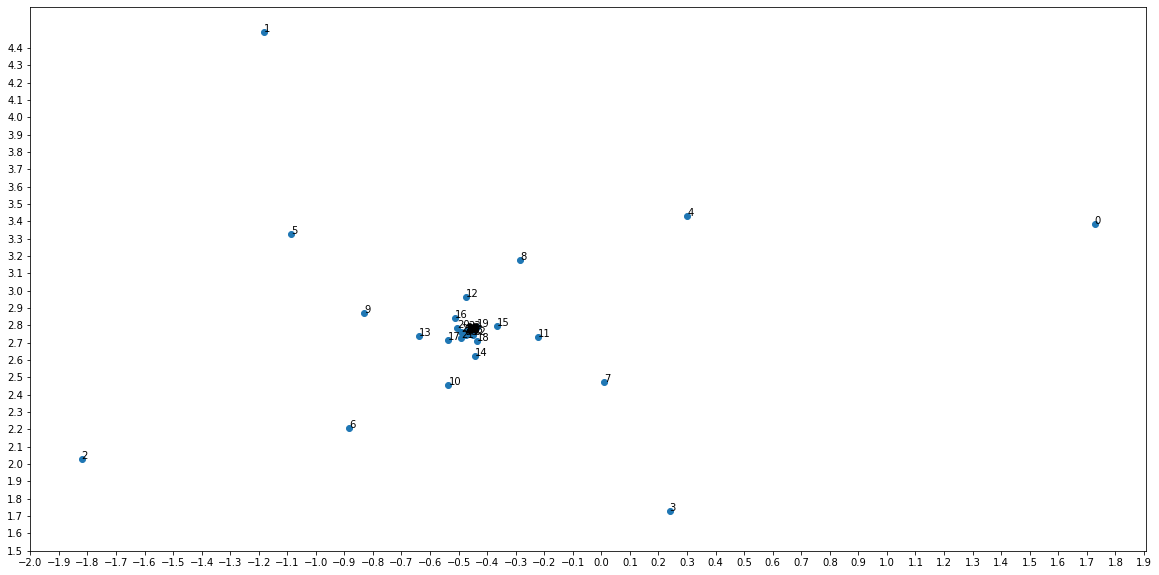

In [0]:
import matplotlib.pyplot as plt

wl_1 = [item[0][0] for item in wl]

plt.scatter(np.real(wl_1), np.imag(wl_1))
plt.show()


x = np.real(wl_1)
y = np.imag(wl_1)
n = [i for i in range(len(x))]

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xticks(np.arange(-2,2, 0.1)) 
plt.yticks(np.arange(1.5,4.5, 0.1)) 

plt.show()
# nicely spiraling in to the target!    

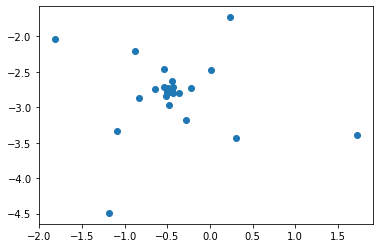

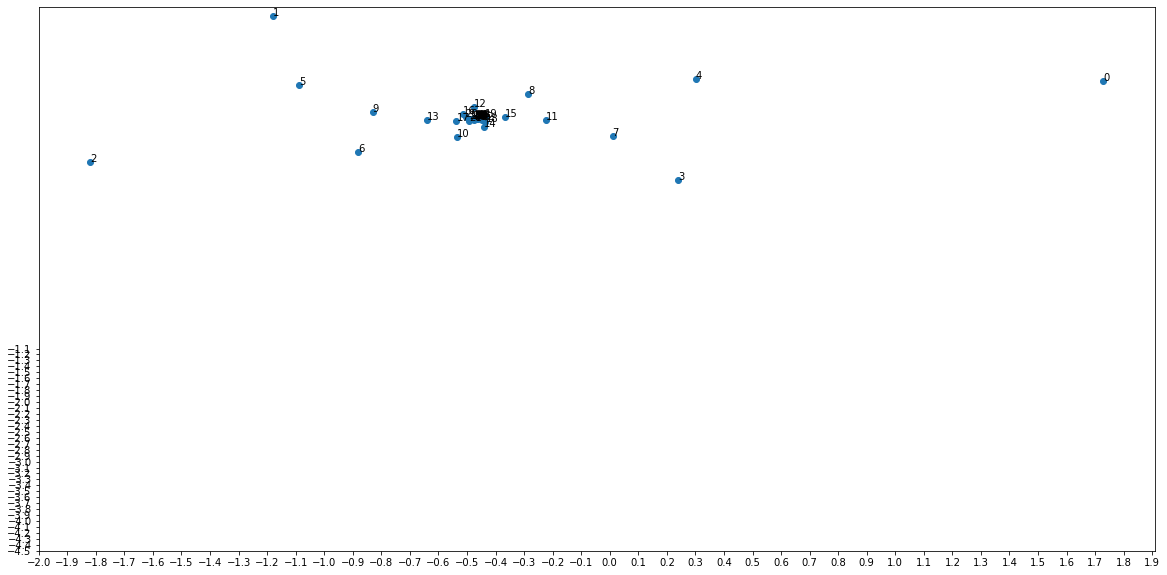

In [0]:

wl_2 = [item[1][0] for item in wl]

plt.scatter(np.real(wl_2), np.imag(wl_2))
plt.show()


x = np.real(wl_1)
y = np.imag(wl_1)
n = [i for i in range(len(x))]

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xticks(np.arange(-2,2, 0.1)) 
plt.yticks(np.arange(-4.5,-1.0, 0.1)) 

plt.show()

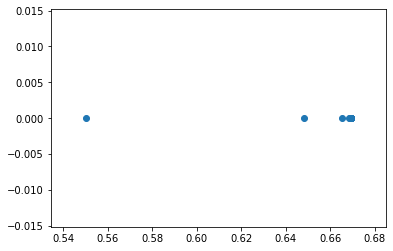

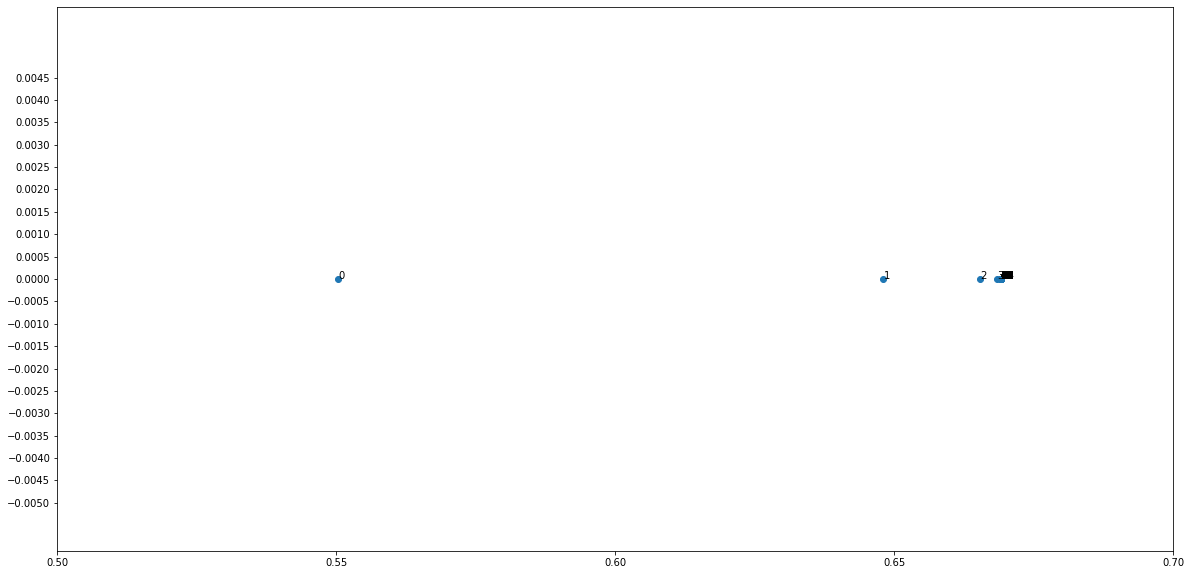

In [0]:

wl_3 = [item[2][0] for item in wl]

plt.scatter(np.real(wl_3), np.imag(wl_3))
plt.show()


x = np.real(wl_3)
y = np.imag(wl_3)
n = [i for i in range(len(x))]

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.xticks(np.arange(.5,.75, 0.05)) 
plt.yticks(np.arange(-0.005,0.005, 0.0005)) 

plt.show()

# Ref
---

* https://www.cis.upenn.edu/~cis515/cis515-12-sl5.pdf
* http://www.robots.ox.ac.uk/~sjrob/Teaching/EngComp/linAlg34.pdf (see page 68 for diagonal dominance) also http://www.robots.ox.ac.uk/~sjrob/Teaching/EngComp/linAlg12.pdf
* https://math.unice.fr/~frapetti/CorsoF/cours2.pdf
* https://math.unice.fr/~frapetti/CorsoF/cours3.pdf
* Diagonal dominance: https://mathworld.wolfram.com/DiagonallyDominantMatrix.html
* https://math.la.asu.edu/~gardner/iter.pdf (and https://iuuk.mff.cuni.cz/~rakdver/linalg/lesson15-8.pdf)


* Online tool to diagonalize: https://www.dcode.fr/matrix-diagonalization (you can copy / paste as mathjax! just need to replace &amp; with & sign)

$$ \begin{array}{l} \text{M}\to \left( \begin{array}{ccc} 0 && -0.5 && -0.75 \\ 0.6 && 0 && 0.4 \\ 0.25 && -0.375 && 0 \\ \end{array} \right) \\ M=P.D.P^{-1} \\ \text{D}\to \left( \begin{array}{ccc} -0.0887509+0.813099 i && 0.\, +0. i && 0.\, +0. i \\ 0.\, +0. i && -0.0887509-0.813099 i && 0.\, +0. i \\ 0.\, +0. i && 0.\, +0. i && 0.177502\, +0. i \\ \end{array} \right) \\ \text{P}\to \left( \begin{array}{ccc} 0.666668\, +0. i && 0.666668\, +0. i && -0.551765+0. i \\ -0.228481-0.58075 i && -0.228481+0.58075 i && -0.627745+0. i \\ 0.231211\, -0.33559 i && 0.231211\, +0.33559 i && 0.549082\, +0. i \\ \end{array} \right) \\ \end{array} $$